# KDE Dataset Generation

## Purpose

We want to generate a new dataset from a dataset which can be smaller and/or bigger than the original dataset.

This dataset also must be equivalent to the original which means that it must keep the same information which is contained in the original.

We will believe that the dataset "essence" is contained in attribute and category distributions so we will estimate `Probabily Density Functions` (PDFs) from the original dataset using `Kernel Density Estimation` (KDE). The new dataset will be built from the original `PDFs`.

## Test Dataset Generation

We will build a custom dataset to simplify the analysis, development and testing.

We need a dataset with only one attribute and two categories. Besides, the category distributions must show a little overlap between them.

We will generate a test dataset with 200 instances (100 instances per category).

Finally, we will plot the dataset distribution (attribute) per category.

Figure 1: Dataset distribution by category


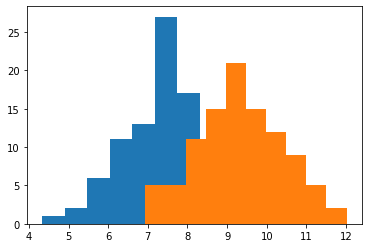

In [1]:
from kde_dataset_generator import dataset

# Dataset params
size = 200
n_categories = 2
seed = 8

# Generate df
df = dataset.generate_univariate_dataset(size, n_categories, seed)

# Plot df
print("Figure 1: Dataset distribution by category")
dataset.plot_univariate(df)


Looking at the chart we can conclude that the test dataset was generated correclty. Even we can see the little overlap.

## KDEs

We need to get the `KDEs` from the dataset distributions to estimate `PDFs`.

We will always generate as many `KDEs` as there are categories. We will take instances associated to a specific category and build the `KDE` from them. Each instance will keep all attributes. That means `KDEs` are multidimensional (one dimension per attribute).

For this case, we will calculate two `KDEs` (1 for category `0`, 1 for category `1`).

In [2]:
from kde_dataset_generator import kde 

# Caculate KDEs
kdes = kde.calculate_kdes(df)[0]

To make sure `PDFs` estimation are right, we will plot category distributions using the previous calculated `KDEs`.

Figure 2: Dataset distributions by category using KDEs based


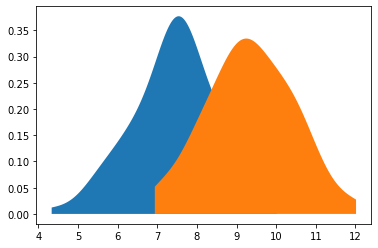

In [3]:
print("Figure 2: Dataset distributions by category using KDEs based")
kde.plot_univariate(df, kdes)

The distributions represented in charts are the same, so we concludes that `KDEs` are right.

# The method

To generate the new dataset we will generate instances randomly and label the new instances using previous `KDEs`.

The possible attribute values of each instance must be contained in attribute intervals (one interval per attribute) which have been calculated from original attribute values.

Once a new instance is generated we will estimate its density using each `KDE`. We will set the label associated to the `KDE` that gives biggest density. We will repeat this process until reach the amount of instances per category which have been defined previously. Instances associate to a category which is full will be discard.

The minimun amount of instances per category is a parameter which depends of the dataset. To optimize this parameter we will need an another study. We will test with different values until getting enough instances to describe correctly each category distribution. We will check it comparing the charts.

We are going to define attribute intervals (just one).

In [4]:
# Get attribute intervals
attribute_intervals = dataset.attribute_intervals(df)

We are going to generate instances and label it until reach the target amount of new instances per category.

In [5]:

# Define amount of new instances per category
n_instances = 500
# Build new dataset
new_df = kde.random_generation(n_instances, kdes, attribute_intervals, df.columns, seed)

             x  category
0     6.074789         0
1     5.303901         0
2     4.987899         0
3     6.234037         0
4     5.941861         0
..         ...       ...
995  11.989140         1
996  11.786689         1
997   8.897383         1
998  11.415039         1
999   9.277397         1

[1000 rows x 2 columns]


NameError: name 'exit' is not defined